<a href="https://colab.research.google.com/github/rmcelfresh/IST718Lab3/blob/master/McElfresh_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading csv file from class github
!pip install -q xlrd
!git clone https://github.com/2SUBDA/IST_718
#grabbing packages from class examples
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline


Cloning into 'IST_718'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), done.


In [2]:
#importing data and doing initial clean (removing white spaces and formatting NAs)
import pandas as pd
import decimal
D = decimal.Decimal
#df = pd.read_csv('IST_718/Coaches9.csv', index_col=0, na_values="--")
df = pd.read_csv('IST_718/Coaches9.csv', na_values="--")

#df.to_csv('coaches9.csv') #created a backup in case original was taken down

df_new = df[df['TotalPay'].notnull()]
df_new.dtypes
#print(df_new)

#print(df)


School          object
Conference      object
Coach           object
SchoolPay       object
TotalPay        object
Bonus           object
BonusPaid       object
AssistantPay    object
Buyout          object
dtype: object

In [3]:
to_drop = ['SchoolPay','Bonus','AssistantPay','Buyout']
df_new.drop(columns=to_drop, inplace=True, axis=0)
df_new.dtypes


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


School        object
Conference    object
Coach         object
TotalPay      object
BonusPaid     object
dtype: object

In [4]:
df_new['TotalPay'] = df_new['TotalPay'].str.replace(r"$","")
df_new['TotalPay'] = df_new['TotalPay'].str.replace(r",","")
df_new['BonusPaid'] = df_new['BonusPaid'].str.replace(r"$","")
df_new['BonusPaid'] = df_new['BonusPaid'].str.replace(r",","")
df_new["BonusPaid"].fillna('0', inplace = True) 

df_new["TotalPay"]=pd.to_numeric(df_new["TotalPay"])
df_new["BonusPaid"]=pd.to_numeric(df_new["BonusPaid"])

df_new.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

School        object
Conference    object
Coach         object
TotalPay       int64
BonusPaid      int64
dtype: object

In [5]:
coachesdf=df_new
coachesdf['PayPlusBonus']=coachesdf['TotalPay'] + coachesdf['BonusPaid']
coachesdf.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,School,Conference,Coach,TotalPay,BonusPaid,PayPlusBonus
0,Air Force,Mt. West,Troy Calhoun,885000,0,885000
1,Akron,MAC,Terry Bowden,412500,50000,462500
2,Alabama,SEC,Nick Saban,8307000,500000,8807000
3,Alabama at Birmingham,C-USA,Bill Clark,900000,165471,1065471
4,Appalachian State,Sun Belt,Scott Satterfield,712500,145000,857500


In [6]:

#setting up Pandas to not show mean in scientific notation
pd.options.display.float_format = '{:.0f}'.format
#creating a pivot table to show average salary per conference
pivot = pd.pivot_table(df_new, values='TotalPay', columns='Conference', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
type(pivot)
#print(pivot)
pivot2=pd.DataFrame.transpose(pivot)
print(pivot2)

            TotalPay
Conference          
AAC          1656268
ACC          3433797
Big 12       4018145
Big Ten      4304014
C-USA         840084
Ind.          985816
MAC           579961
Mt. West     1005938
Pac-12       2890119
SEC          4643456
Sun Belt      650650


In [0]:
#importing stadium sizes
#first attempt--used a different method
#for reference on reading from Wikipedia https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722
#import requests
#website_url=requests.get('https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums').text
#from bs4 import BeautifulSoup
#soup= BeautifulSoup(website_url,'lxml')
#print(soup.prettify())

In [0]:
#second attempt at stadium sizes--worked better
#table = pd.read_html(str(My_table))
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums", header= 0, flavor ='bs4') [0]
#table
#table.to_csv('stadium_sizes.csv')



In [9]:
table2 = table[["Stadium", "State", "Team", "Conference", "Capacity"]]

table2.iloc[5]

table2.ix[5,'Team']='Hawaii'

#table2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
#removing the capacity citations
table2['Capacity'] = table2['Capacity'].str.replace(r"\[.*\]","")
table2['Capacity'] = table2['Capacity'].str.replace(r",","")

#table2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
table2.dtypes

table2["Capacity"]=pd.to_numeric(table2["Capacity"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
table2.dtypes
stadiumdf=table2


In [13]:
#downloaded gsr data from NCAA for football teams with 2006-2007 selected-- cleaned up data in Excel and saved as a CSV file.
#gsr = gradution success rate
#fgr = federal graduation rate ( all students)
!git clone https://github.com/rmcelfresh/IST718Lab3
gsrurl = "IST718Lab3/GSR.csv"
gsrdf = pd.read_csv(gsrurl, sep = ",")
gradsuccessdf=gsrdf

#gsrdf.to_csv('gradsucc.csv')

Cloning into 'IST718Lab3'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [0]:
#downloading a cleaned up revenue table-- original source https://ope.ed.gov/athletics/#/customdata/datafiltered-- used 2006 
FootballRevenueURL = "IST718Lab3/FootballRevenue.csv"
FootballRevenue = pd.read_csv(FootballRevenueURL, sep = ",")
FootballRevenuedf=FootballRevenue

In [0]:
#copied team record data from google for football teams for 2006-- cleaned up data in Excel and saved as a CSV file.
#need to upload file Record.csv to Files section
recordurl = "IST718Lab3/Record.csv"
recorddf = pd.read_csv(recordurl, sep = ",")
#recorddf
#recorddf.to_csv('recorddf.csv')

In [16]:
recorddf.dtypes

School         object
Conference     object
Division       object
ConfWins        int64
ConfLoss        int64
OverallWins     int64
OverallLoss     int64
HomeWins        int64
HomeLoss        int64
AwayWins        int64
AwayLoss        int64
dtype: object

In [0]:
#couldn't find data from 2006-- using 2016-2017 data from USA Today
#found better data--see below
#revenueurl = "https://sports.usatoday.com/ncaa/finances/"
#revtable = pd.read_html(revenueurl, header= 0, flavor ='bs4') [0]
#revtable
#revtable.to_csv('revtable.csv')

In [0]:
#Cleaning the Revenue Table
#revtable['Total Revenue'] = revtable['Total Revenue'].str.replace(r"$","")
#revtable['Total Revenue'] = revtable['Total Revenue'].str.replace(r",","")
#revtable['Total Revenue'] = revtable['Total Revenue'].str.replace(r"*","")
#revtable['Total Expenses'] = revtable['Total Expenses'].str.replace(r"$","")
#revtable['Total Expenses'] = revtable['Total Expenses'].str.replace(r",","")
#revtable['Total Expenses'] = revtable['Total Expenses'].str.replace(r"*","")
#revtable['Total Allocated'] = revtable['Total Allocated'].str.replace(r"$","")
#revtable['Total Allocated'] = revtable['Total Allocated'].str.replace(r",","")
#revtable['Total Allocated'] = revtable['Total Allocated'].str.replace(r"*","")
#revtable2=revtable[:230] #get rid wrongly imported last line
#revtable2["Total Allocated"]=pd.to_numeric(revtable2["Total Allocated"])
#revtable2["Total Expenses"]=pd.to_numeric(revtable2["Total Expenses"])
#revtable2["Total Revenue"]=pd.to_numeric(revtable2["Total Revenue"])

#print(revtable2.dtypes) #making sure it worked
#print(revtable2.shape) #making sure we kept everything
#revenuedf=revtable2

In [19]:
#need to combine all of these datasets into one....
#going to start by using the full names from the NCAA GSR dataset
!pip install fuzzywuzzy
!pip install python-Levenshtein

from fuzzywuzzy import fuzz 
from fuzzywuzzy import process


    100% |████████████████████████████████| 51kB 2.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [0]:
#school nicknames
NameCleanup = "IST718Lab3/NameCleanup.csv"
NameCleanupdf = pd.read_csv(NameCleanup, sep = ",")
#NameCleanupdf


In [21]:
print(list(stadiumdf))
print(list(NameCleanupdf))

['Stadium', 'State', 'Team', 'Conference', 'Capacity']
['CurrentName', 'ShouldBe']


In [0]:
#stadiumdf.replace(to_replace={'Teams':{NameCleanupdf['Teams'] : NameCleanupdf[ShouldBe]}},value=None,inplace=True)
cleanstadiumdf = pd.merge(left=stadiumdf, right = NameCleanupdf, how='left', left_on='Team', right_on='CurrentName')
cleanstadiumdf
cleanstadiumdf['SchoolNameFinal']=cleanstadiumdf['ShouldBe'].fillna(cleanstadiumdf['Team'])
#cleanstadiumdf


In [23]:
print(list(coachesdf))
print(list(NameCleanupdf))
cleancoachesdf = pd.merge(left=coachesdf, right = NameCleanupdf, how='left', left_on='School', right_on='CurrentName')
cleancoachesdf['SchoolNameFinal']=cleancoachesdf['ShouldBe'].fillna(cleancoachesdf['School'])
#cleancoachesdf

['School', 'Conference', 'Coach', 'TotalPay', 'BonusPaid', 'PayPlusBonus']
['CurrentName', 'ShouldBe']


In [24]:
print(list(recorddf))
print(list(NameCleanupdf))
cleanrecorddf = pd.merge(left=recorddf, right = NameCleanupdf, how='left', left_on='School', right_on='CurrentName')
cleanrecorddf['SchoolNameFinal']=cleanrecorddf['ShouldBe'].fillna(cleanrecorddf['School'])
#cleanrecorddf

['School', 'Conference', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss']
['CurrentName', 'ShouldBe']


In [0]:
gradsuccessdf['SchoolName']=gradsuccessdf['School']
#Specific Corrections--some of these were generated after looking at working df output below...
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Texas A&M University, College Station","Texas A&M")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University at Buffalo, the State University of New York","Buffalo")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"-Madison","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"U.S. Naval Academy","Navy")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"U.S. Air Force Academy","Air Force")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"U.S. Military Academy","Army")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"U.S. Military Academy","Purdue")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Indiana University, Bloomington","Indiana")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Alabama at Birmingham","UAB")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Hawaii, Manoa","Hawaii")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Arkansas, Fayetteville","Arkansas")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Bowling Green State University","Bowling Green")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of California, Berkeley","California")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Colorado, Boulder","Colorado")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"California State University, Fresno","Fresno State")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Georgia Institute of Technology","Georgia Tech")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Illinois Urbana-Champaign","Illinois")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Louisiana at Monroe","Louisiana-Monroe")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Louisiana at Lafayette","Louisiana-Lafayette")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Louisiana State University","LSU")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Maryland, College Park","Maryland")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Massachusetts, Amherst","Massachusetts")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Miami (Florida)","Miami FL")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Middle Tennessee State University","Middle Tennessee")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Minnesota, Twin Cities","Minnesota")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Nebraska, Lincoln","Nebraska")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Nevada, Las Vegas","Nevada-Las Vegas")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Nevada, Reno","Nevada")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"North Carolina State University","North Carolina State")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"The Ohio State University","Ohio State")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Pennsylvania State University","Penn State")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Rutgers, The State University of New Jersey, New Brunswick","Rutgers")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of South Carolina, Columbia","South Carolina")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"The University of Southern Mississippi","Southern Mississippi")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Tennessee, Knoxville","Tennessee")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Texas at Austin","Texas")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of Texas at El Paso","Texas-El Paso")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"The University of Tulsa","Tulsa")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of California, Los Angeles","UCLA")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Virginia Polytechnic Institute and State University","Virginia Tech")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University of North Carolina, Chapel Hill","North Carolina")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Missouri State University","Missouri")

#general corrections
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r" University","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"University ","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"College ","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r" College","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"of ","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r" of","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"at ","")
gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r" at","")

gradsuccessdf['SchoolName'] = gradsuccessdf['SchoolName'].str.replace(r"Boston","Boston College")


#gradsuccessdf





In [26]:
print(list(gradsuccessdf))
print(list(NameCleanupdf))
cleangradsuccessdf = pd.merge(left=gradsuccessdf, right = NameCleanupdf, how='left', left_on='SchoolName', right_on='CurrentName')
cleangradsuccessdf['SchoolNameFinal']=cleangradsuccessdf['ShouldBe'].fillna(cleangradsuccessdf['SchoolName'])
#cleangradsuccessdf.to_csv('GRADSUCCESS.csv')

['Cohort Year', 'School', 'Conference', 'Sport', 'State', 'GSR', 'FGR', 'SchoolName']
['CurrentName', 'ShouldBe']


In [0]:
FootballRevenuedf['SchoolName']=FootballRevenuedf['School']
#Specific Corrections--some of these were generated after looking at working df output below...
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Texas A&M University, College Station","Texas A&M")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"SUNY at Buffalo","Buffalo")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"-Madison","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"U.S. Naval Academy","Navy")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"U.S. Air Force Academy","Air Force")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"U.S. Military Academy","Army")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"U.S. Military Academy","Purdue")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Indiana University, Bloomington","Indiana")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Alabama at Birmingham","UAB")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Hawaii at Manoa","Hawaii")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Arkansas, Fayetteville","Arkansas")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Bowling Green State University","Bowling Green")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of California-Berkeley","California")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Colorado at Boulder","Colorado")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"California State University-Fresno","Fresno State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Georgia Institute of Technology","Georgia Tech")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Illinois at Urbana-Champaign","Illinois")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Louisiana at Monroe","Louisiana-Monroe")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Louisiana at Lafayette","Louisiana-Lafayette")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Louisiana State University and Agricultural & Mechanical College","LSU")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Maryland, College Park","Maryland")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Massachusetts-Amherst","Massachusetts")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Miami (Florida)","Miami FL")

FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Middle Tennessee State University","Middle Tennessee")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Minnesota, Twin Cities","Minnesota")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Nebraska, Lincoln","Nebraska")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Nevada-Las Vegas","Nevada-Las Vegas")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Nevada-Reno","Nevada")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Ohio State University-Main Campus","Ohio State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Pennsylvania State University-Main Campus","Penn State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Rutgers University-New Brunswick/Piscataway","Rutgers")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of South Carolina-Columbia","South Carolina")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"The University of Southern Mississippi","Southern Mississippi")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Tennessee, Knoxville","Tennessee")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Texas at Austin","Texas")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Texas at El Paso","Texas-El Paso")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"The University of Tulsa","Tulsa")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of California, Los Angeles","UCLA")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Virginia Polytechnic Institute and State University","Virginia Tech")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of North Carolina at Chapel Hill","North Carolina")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Arizona State University at the Tempe Campus","Arizona State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Missouri State University","Missouri")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Arkansas State University-Main Campus","Arkansas State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Bowling Green State University-Main Campus","Bowling Green")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Indiana University-Bloomington","Indiana")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Kent State University-Kent Campus","Kent State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Michigan-Ann Arbor","Michigan")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Minnesota-Twin Cities","Minnesota")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Nebraska at Lincoln","Nebraska")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of New Mexico-Main Campus","New Mexico")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"New Mexico State University-Main Campus","New Mexico State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"North Carolina State University at Raleigh","North Carolina State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Ohio University-Main Campus","Ohio")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Oklahoma State University-Main Campus","Oklahoma State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Oklahoma Norman Campus","Oklahoma")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Pittsburgh-Main Campus","Pittsburgh")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Purdue University-Main Campus","Purdue")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Texas A & M University","Texas A&M")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Texas State University-San Marcos","Texas State")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"The University of Texas at Austin","Texas")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Toledo-Main Campus","Toledo")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Tulane University of Louisiana","Tulane")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of California-Los Angeles","UCLA")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Virginia-Main Campus","Virginia")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University of Washington-Seattle Campus","Washington")



#general corrections
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r" University","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"University ","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"College ","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r" Main Campus","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Main Campus ","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"-Main Campus","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r" College","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"of ","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r" of","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"at ","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r" at","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r" The","")
FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"The ","")

FootballRevenuedf['SchoolName'] = FootballRevenuedf['SchoolName'].str.replace(r"Boston","Boston College")
FootballRevenuedf.to_csv('FootballRevenuedf.csv')

#FootballRevenuedf
#no data available for UMaryland
#no data available for UMiami OH
#no data available for Old Dominion
#no data available for South Alabama

cleanrevenuedf=FootballRevenuedf

In [28]:
print(list(cleanrevenuedf))
print(list(NameCleanupdf))
cleanrevenuedf = pd.merge(left=cleanrevenuedf, right = NameCleanupdf, how='left', left_on='SchoolName', right_on='CurrentName')
cleanrevenuedf['SchoolNameFinal']=cleanrevenuedf['ShouldBe'].fillna(cleanrevenuedf['SchoolName'])


['Survey Year', 'School', 'Classification', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'SchoolName']
['CurrentName', 'ShouldBe']


In [29]:
print("cleangradsuccessdf ",list(cleangradsuccessdf))
print("cleanrevenuedf ",list(cleanrevenuedf))
print("cleanrecorddf ",list(cleanrecorddf))
print("cleancoachesdf ",list(cleancoachesdf))
print("cleanstadiumdf ",list(cleanstadiumdf))


cleangradsuccessdf  ['Cohort Year', 'School', 'Conference', 'Sport', 'State', 'GSR', 'FGR', 'SchoolName', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
cleanrevenuedf  ['Survey Year', 'School', 'Classification', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'SchoolName', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
cleanrecorddf  ['School', 'Conference', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
cleancoachesdf  ['School', 'Conference', 'Coach', 'TotalPay', 'BonusPaid', 'PayPlusBonus', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']
cleanstadiumdf  ['Stadium', 'State', 'Team', 'Conference', 'Capacity', 'CurrentName', 'ShouldBe', 'SchoolNameFinal']


In [54]:
WorkingDf = pd.merge(left=cleancoachesdf, right = cleangradsuccessdf, how='left', left_on='SchoolNameFinal', right_on='SchoolNameFinal')
WorkingDf = pd.merge(left=WorkingDf, right = cleanrevenuedf  , how='left', left_on='SchoolNameFinal', right_on='SchoolNameFinal')
WorkingDf = pd.merge(left=WorkingDf, right = cleanrecorddf  , how='left', left_on='SchoolNameFinal', right_on='SchoolNameFinal')
WorkingDf = pd.merge(left=WorkingDf, right = cleanstadiumdf  , how='left', left_on='SchoolNameFinal', right_on='SchoolNameFinal')
print("WorkingDf ",list(WorkingDf))

WorkingDf  ['School_x', 'Conference_x', 'Coach', 'TotalPay', 'BonusPaid', 'PayPlusBonus', 'CurrentName_x', 'ShouldBe_x', 'SchoolNameFinal', 'Cohort Year', 'School_y', 'Conference_y', 'Sport', 'State_x', 'GSR', 'FGR', 'SchoolName_x', 'CurrentName_y', 'ShouldBe_y', 'Survey Year', 'School_x', 'Classification', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'SchoolName_y', 'CurrentName_x', 'ShouldBe_x', 'School_y', 'Conference_x', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'CurrentName_y', 'ShouldBe_y', 'Stadium', 'State_y', 'Team', 'Conference_y', 'Capacity', 'CurrentName', 'ShouldBe']


In [55]:
WorkingDf=WorkingDf.drop(columns=['School_x','CurrentName_x', 'ShouldBe_x','Cohort Year','School_y', 'Conference_y', 'Sport', 'State_x','SchoolName_x', 'CurrentName_y', 'ShouldBe_y', 'Survey Year', 'School_x', 'Classification','SchoolName_y', 'CurrentName_x', 'ShouldBe_x', 'School_y','CurrentName_y', 'ShouldBe_y', 'State_y', 'Team', 'Conference_y','CurrentName', 'ShouldBe'])
print("WorkingDf ",list(WorkingDf))

WorkingDf  ['Conference_x', 'Coach', 'TotalPay', 'BonusPaid', 'PayPlusBonus', 'SchoolNameFinal', 'GSR', 'FGR', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'Conference_x', 'Division', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'Stadium', 'Capacity']


In [56]:
WorkingDf=WorkingDf[['SchoolNameFinal', 'Coach', 'Conference_x','Stadium','Division','TotalPay', 'BonusPaid', 'PayPlusBonus','TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue' , 'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'Capacity']]
cols=pd.Series(WorkingDf.columns)
for dup in WorkingDf.columns.get_duplicates(): cols[WorkingDf.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(WorkingDf.columns.get_loc(dup).sum())]
WorkingDf.columns=cols

WorkingDf.dtypes
WorkingDf.to_csv('WorkingDf.csv')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
print(WorkingDf.dtypes)
WorkingDf.head()
print("WorkingDf ",list(WorkingDf))


SchoolNameFinal        object
Coach                  object
Conference_x           object
Conference_x.1         object
Stadium                object
Division               object
TotalPay                int64
BonusPaid               int64
PayPlusBonus            int64
TotalUndergrads       float64
FootballRevenue       float64
TotalSportsRevenue    float64
GSR                   float64
FGR                   float64
ConfWins              float64
ConfLoss              float64
OverallWins           float64
OverallLoss           float64
HomeWins              float64
HomeLoss              float64
AwayWins              float64
AwayLoss              float64
Capacity                int64
dtype: object
WorkingDf  ['SchoolNameFinal', 'Coach', 'Conference_x', 'Conference_x.1', 'Stadium', 'Division', 'TotalPay', 'BonusPaid', 'PayPlusBonus', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue', 'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayW

In [58]:
#for schools without revenue information or GSR information-- using the average from the field to allow them to be regressed
WorkingDf2= WorkingDf.dropna(axis=0, subset=['GSR'])
WorkingDf2= WorkingDf.dropna(axis=0, subset=['TotalUndergrads'])
WorkingDf2.columns = ['SchoolNameFinal', 'Coach', 'Conference', "Historic_Conference",'Stadium','Division','TotalPay','BonusPaid', 'PayPlusBonus', 'TotalUndergrads', 'FootballRevenue', 'TotalSportsRevenue' , 'GSR', 'FGR', 'ConfWins', 'ConfLoss', 'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss', 'Capacity']
WorkingDf2.head()


,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,...,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity
1,Akron,Terry Bowden,MAC,Mid-American East,InfoCision Stadium–Summa Field,Mid-American East Division,412500,50000,462500,11824,...,52,3,5,5,7,4,1,1,6,30000
2,Alabama,Nick Saban,SEC,SEC,Bryant–Denny Stadium,SEC Western Division,8307000,500000,8807000,17784,...,57,2,6,6,7,6,3,0,4,101821
3,UAB,Bill Clark,C-USA,USA,Legion Field,USA East Division,900000,165471,1065471,10753,...,55,2,6,3,9,3,3,0,6,71594
4,Appalachian State,Scott Satterfield,Sun Belt,NaN,Kidd Brewer Stadium,NaN,712500,145000,857500,12442,...,56,nan,nan,nan,nan,nan,nan,nan,nan,30000
5,Arizona,Kevin Sumlin,Pac-12,Pacific-10 Conference,Arizona Stadium,Pacific-10 Conference football season,2000000,0,2000000,28442,...,59,4,5,6,6,3,4,3,2,56029


In [59]:
#for schools w/o revenue and expenses filling those with the mean for both variables
#note--syracuse is included in this group

WorkingDf2.fillna(WorkingDf2.mean(), inplace=True)
WorkingDf2.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SchoolNameFinal,Coach,Conference,Historic_Conference,Stadium,Division,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,...,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity
1,Akron,Terry Bowden,MAC,Mid-American East,InfoCision Stadium–Summa Field,Mid-American East Division,412500,50000,462500,11824,...,52,3,5,5,7,4,1,1,6,30000
2,Alabama,Nick Saban,SEC,SEC,Bryant–Denny Stadium,SEC Western Division,8307000,500000,8807000,17784,...,57,2,6,6,7,6,3,0,4,101821
3,UAB,Bill Clark,C-USA,USA,Legion Field,USA East Division,900000,165471,1065471,10753,...,55,2,6,3,9,3,3,0,6,71594
4,Appalachian State,Scott Satterfield,Sun Belt,NaN,Kidd Brewer Stadium,NaN,712500,145000,857500,12442,...,56,4,4,7,6,4,3,2,4,30000
5,Arizona,Kevin Sumlin,Pac-12,Pacific-10 Conference,Arizona Stadium,Pacific-10 Conference football season,2000000,0,2000000,28442,...,59,4,5,6,6,3,4,3,2,56029


In [0]:
#WorkingDf2.to_csv('WorkingDf2.csv')


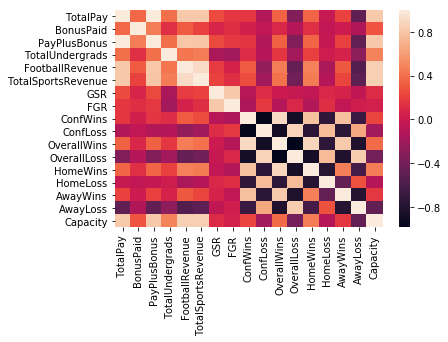

In [60]:
#reviewing the dataset
corr=WorkingDf2.corr()
sns.heatmap(corr)


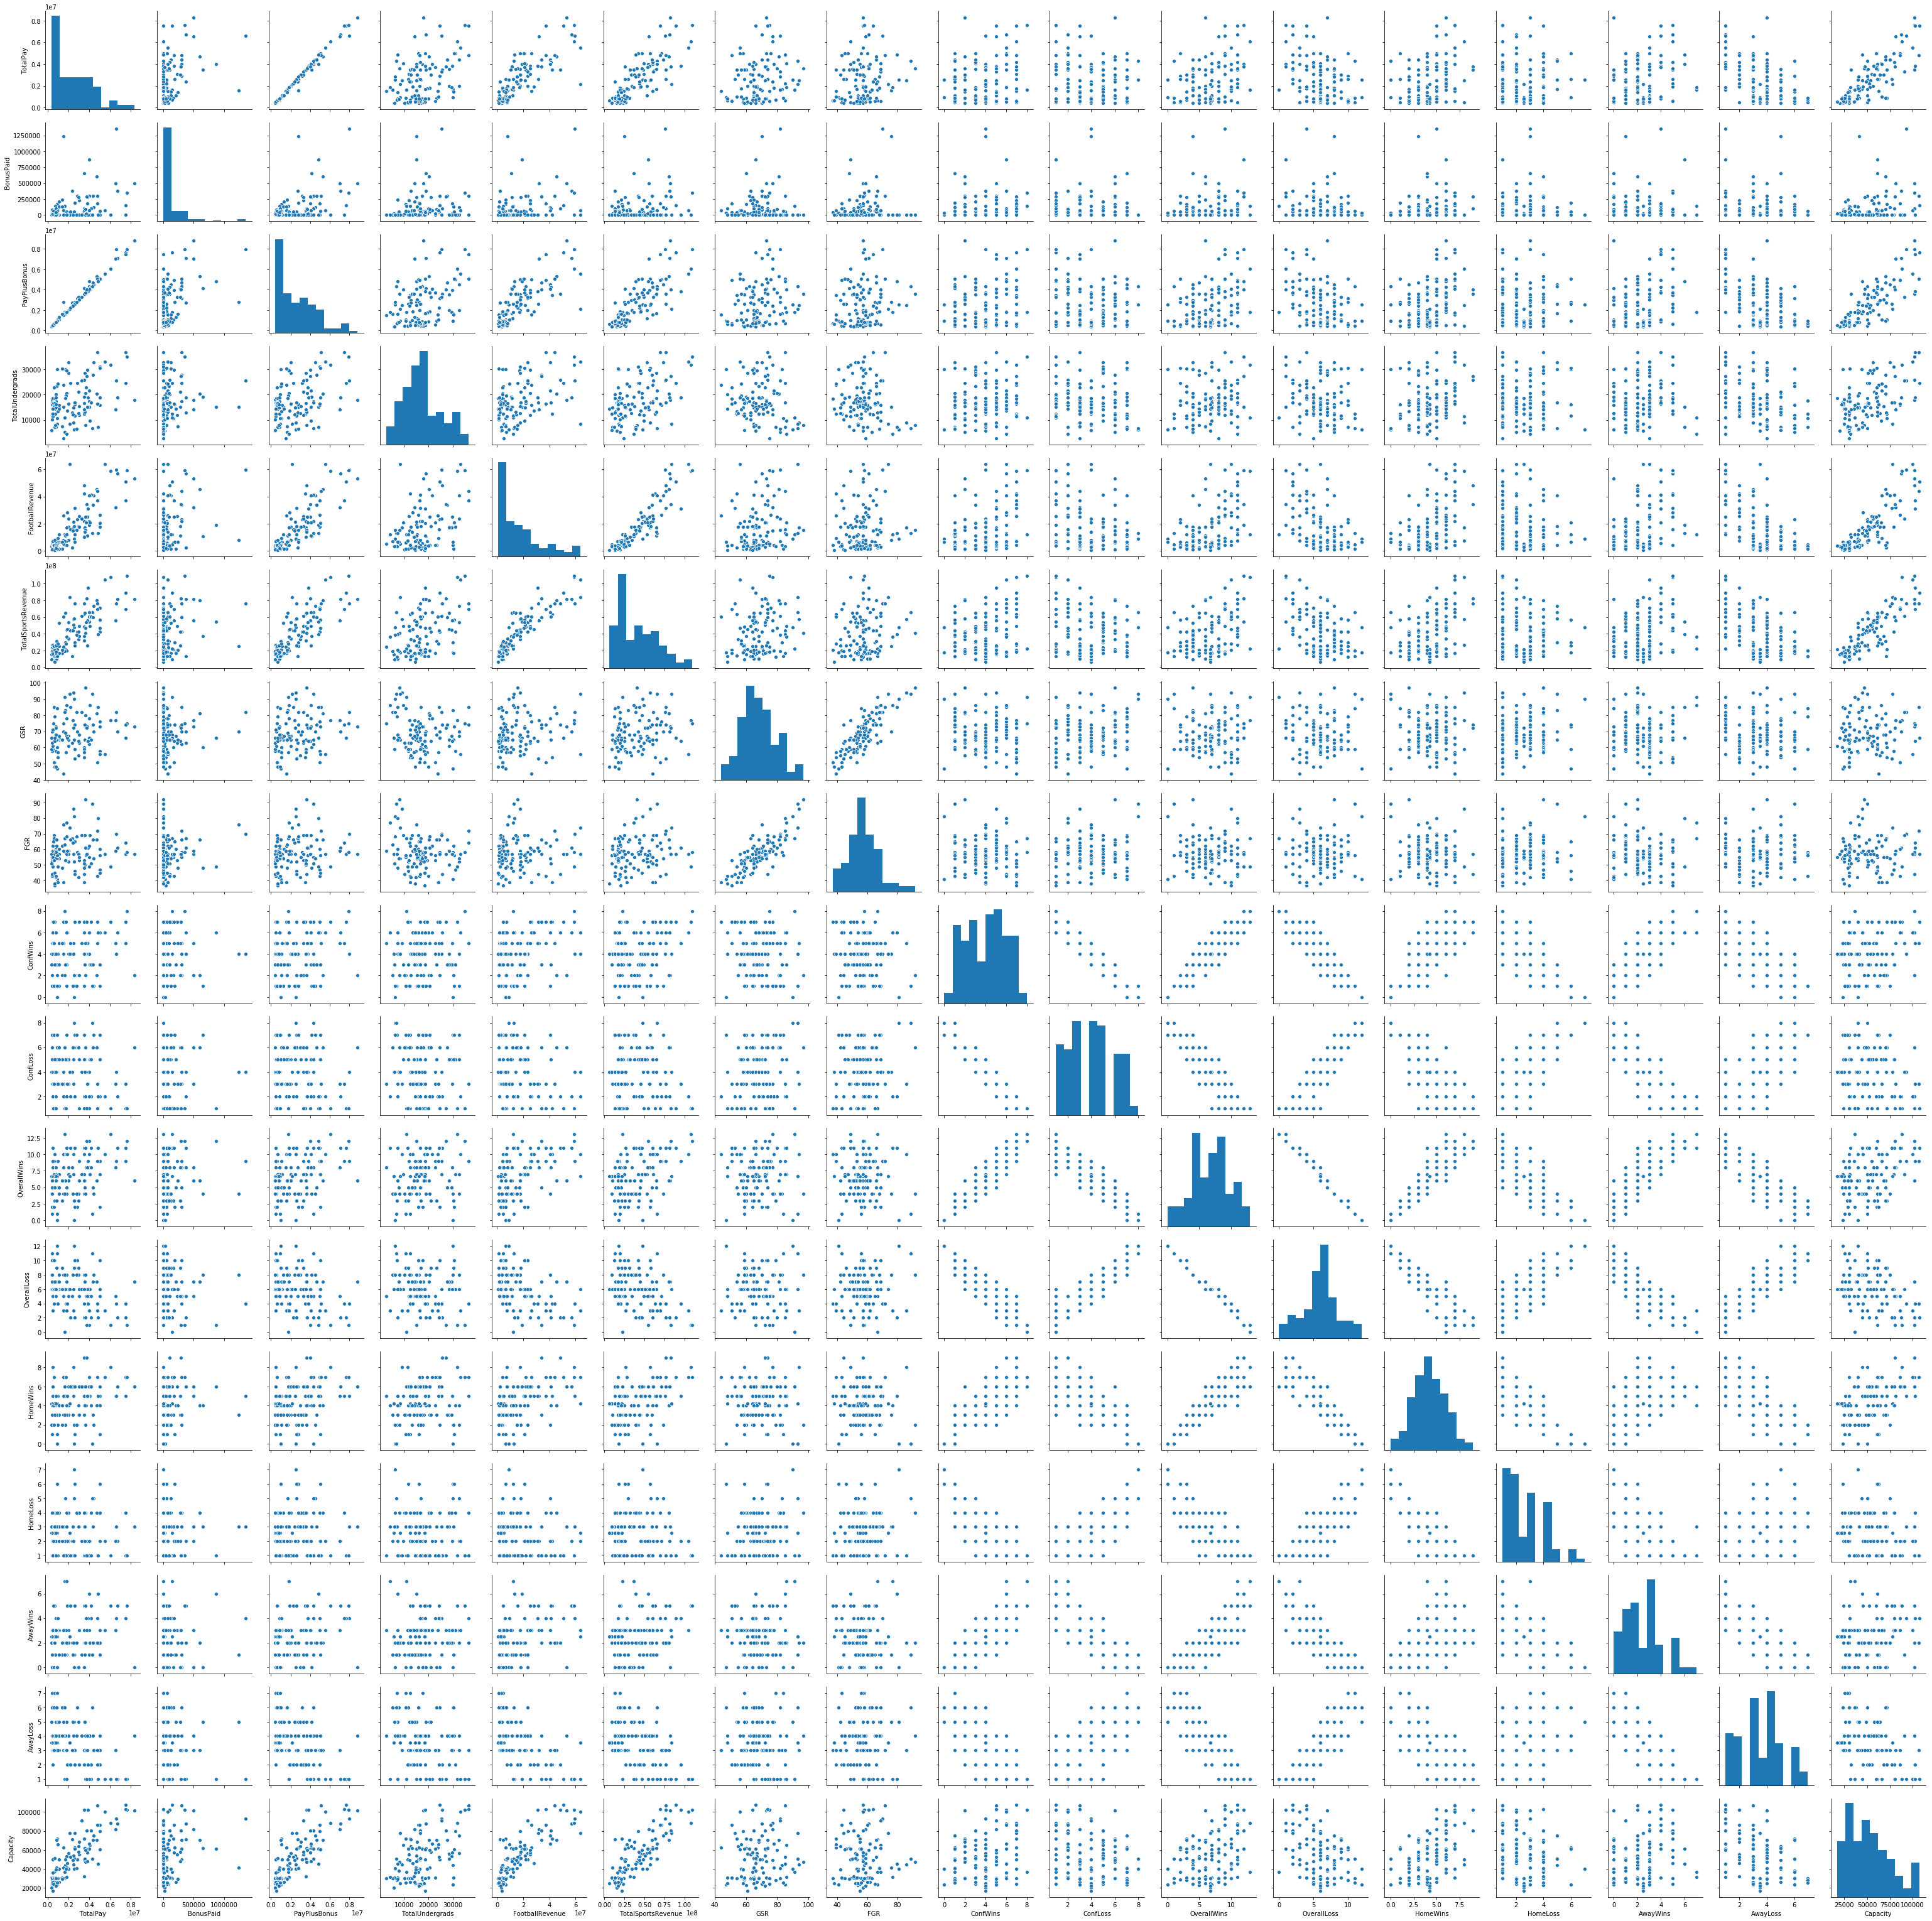

In [61]:
sns.pairplot(WorkingDf2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


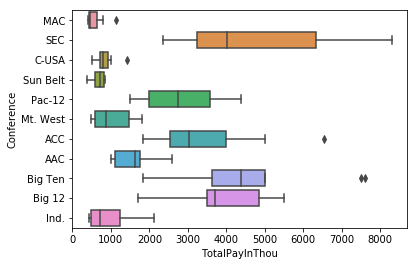

In [62]:
WorkingDf3=WorkingDf2
WorkingDf3["TotalPayInThou"]=WorkingDf3["TotalPay"]/1000
sns.boxplot(x="TotalPayInThou", y="Conference", hue=None, data=WorkingDf3)


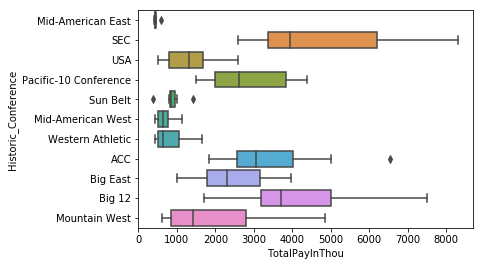

In [63]:
sns.boxplot(x="TotalPayInThou", y="Historic_Conference", hue=None, data=WorkingDf3)


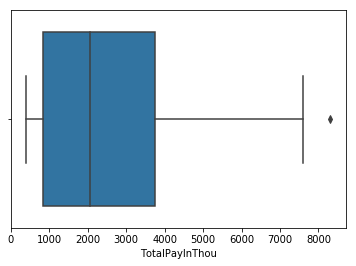

In [67]:
sns.boxplot(x="TotalPayInThou",  hue=None, data=WorkingDf3)


In [86]:
WorkingDf2.describe()

,TotalPay,BonusPaid,PayPlusBonus,TotalUndergrads,FootballRevenue,TotalSportsRevenue,GSR,FGR,ConfWins,ConfLoss,OverallWins,OverallLoss,HomeWins,HomeLoss,AwayWins,AwayLoss,Capacity,TotalPayInThou
count,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
mean,2549712,113517,2663229,17578,17435158,41336084,69,57,4,4,7,6,4,3,2,4,52699,2550
std,1909052,217457,1999635,7723,16341989,24770574,11,10,2,2,3,3,2,1,2,2,23396,1909
min,390000,0,390000,2712,639253,6519930,44,37,0,1,0,0,0,1,0,1,17000,390
25%,824685,0,865484,12433,4460574,19543705,61,52,3,3,4,4,3,1,1,3,30449,825
50%,2064819,37125,2189819,16536,12094808,37171105,67,57,4,4,7,6,4,2,2,4,50036,2065
75%,3759479,126000,3995000,21788,23938230,59871020,75,62,5,5,9,8,6,3,3,4,66775,3759
max,8307000,1350000,8807000,36612,63798068,109382222,97,92,8,8,13,12,9,7,7,7,107601,8307


In [64]:
my_model = str('PayPlusBonus ~ Conference + GSR+ FGR + FootballRevenue +TotalUndergrads+ConfWins + ConfLoss + Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit = smf.ols(my_model, data=WorkingDf2).fit()
print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     23.86
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.90e-27
Time:                        02:25:09   Log-Likelihood:                -1752.1
No. Observations:                 116   AIC:                             3540.
Df Residuals:                      98   BIC:                             3590.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.18

In [65]:
my_model1 = str('PayPlusBonus ~ Conference + GSR+ FGR + FootballRevenue +TotalUndergrads+OverallWins + OverallLoss + Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit1 = smf.ols(my_model1, data=WorkingDf2).fit()
print(model_fit1.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     23.92
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           1.71e-27
Time:                        02:25:09   Log-Likelihood:                -1752.0
No. Observations:                 116   AIC:                             3540.
Df Residuals:                      98   BIC:                             3590.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.20

In [78]:
my_model2 = str('PayPlusBonus ~ Conference + GSR + FGR + FootballRevenue +TotalUndergrads  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit2 = smf.ols(my_model2, data=WorkingDf2).fit()
print(model_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     27.41
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           8.77e-29
Time:                        02:51:04   Log-Likelihood:                -1752.4
No. Observations:                 116   AIC:                             3537.
Df Residuals:                     100   BIC:                             3581.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9.76

In [70]:
my_model3 = str('PayPlusBonus ~ Conference + GSR + FootballRevenue +TotalUndergrads  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit3 = smf.ols(my_model3, data=WorkingDf2).fit()
print(model_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     29.19
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.98e-29
Time:                        02:47:23   Log-Likelihood:                -1753.2
No. Observations:                 116   AIC:                             3536.
Df Residuals:                     101   BIC:                             3578.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9.47

In [71]:
my_model4 = str('PayPlusBonus ~ Conference + GSR + FootballRevenue  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit4 = smf.ols(my_model4, data=WorkingDf2).fit()
print(model_fit4.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     31.58
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           6.37e-30
Time:                        02:47:25   Log-Likelihood:                -1753.4
No. Observations:                 116   AIC:                             3535.
Df Residuals:                     102   BIC:                             3573.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.23

In [83]:
my_model44 = str('PayPlusBonus ~ Conference + FGR +FootballRevenue+ Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit44 = smf.ols(my_model44, data=WorkingDf2).fit()
print(model_fit44.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     32.03
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           3.62e-30
Time:                        02:57:46   Log-Likelihood:                -1752.8
No. Observations:                 116   AIC:                             3534.
Df Residuals:                     102   BIC:                             3572.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.62

In [85]:
my_modelhist = str('PayPlusBonus ~ Historic_Conference + FGR +FootballRevenue+ Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fithist = smf.ols(my_modelhist, data=WorkingDf2).fit()
print(model_fithist.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     23.26
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.40e-22
Time:                        03:08:51   Log-Likelihood:                -1465.6
No. Observations:                  97   AIC:                             2959.
Df Residuals:                      83   BIC:                             2995.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [84]:
my_model444 = str('PayPlusBonus ~ Conference + FGR')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit444 = smf.ols(my_model444, data=WorkingDf2).fit()
print(model_fit444.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     18.73
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           4.53e-20
Time:                        02:59:13   Log-Likelihood:                -1783.7
No. Observations:                 116   AIC:                             3591.
Df Residuals:                     104   BIC:                             3624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.98

In [88]:
my_modelhistNoConf = str('PayPlusBonus ~ FGR + FootballRevenue')
model_fitNoConf = smf.ols(my_modelhistNoConf, data=WorkingDf2).fit()
print(model_fitNoConf.summary())

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.87e-28
Time:                        03:45:33   Log-Likelihood:                -1782.0
No. Observations:                 116   AIC:                             3570.
Df Residuals:                     113   BIC:                             3578.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.514e+05   6.06e+05     

In [72]:
my_model5 = str('PayPlusBonus ~ Conference + GSR + TotalSportsRevenue  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit5 = smf.ols(my_model5, data=WorkingDf2).fit()
print(model_fit5.summary())
#less acurate

                            OLS Regression Results                            
Dep. Variable:           PayPlusBonus   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           7.10e-28
Time:                        02:47:28   Log-Likelihood:                -1759.0
No. Observations:                 116   AIC:                             3546.
Df Residuals:                     102   BIC:                             3584.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.59

In [73]:
my_model6 = str('TotalPay ~ Conference + GSR + TotalSportsRevenue  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit6 = smf.ols(my_model6, data=WorkingDf2).fit()
print(model_fit6.summary())
#less acurate

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     31.54
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           6.66e-30
Time:                        02:47:37   Log-Likelihood:                -1748.1
No. Observations:                 116   AIC:                             3524.
Df Residuals:                     102   BIC:                             3563.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.45

In [74]:
my_model9 = str('TotalPay ~ Historic_Conference + GSR + TotalSportsRevenue  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit9 = smf.ols(my_model9, data=WorkingDf2).fit()
print(model_fit9.summary())
#less acurate

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     21.08
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           5.13e-21
Time:                        02:47:41   Log-Likelihood:                -1464.6
No. Observations:                  97   AIC:                             2957.
Df Residuals:                      83   BIC:                             2993.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [75]:
my_model7 = str('BonusPaid ~ Conference + GSR + TotalSportsRevenue  +Capacity')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit7 = smf.ols(my_model7, data=WorkingDf2).fit()
print(model_fit7.summary())
#less acurate

                            OLS Regression Results                            
Dep. Variable:              BonusPaid   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.062
Date:                Sun, 28 Apr 2019   Prob (F-statistic):              0.401
Time:                        02:47:45   Log-Likelihood:                -1582.3
No. Observations:                 116   AIC:                             3193.
Df Residuals:                     102   BIC:                             3231.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.41

In [76]:
my_model8 = str('BonusPaid ~ Conference + GSR + TotalSportsRevenue  +Capacity+ ConfWins')
#'OverallWins', 'OverallLoss', 'HomeWins', 'HomeLoss', 'AwayWins', 'AwayLoss','Total Expenses', -unused numeric variables 
               #didn't use total expenses bc total pay would be included in it.
model_fit8 = smf.ols(my_model8, data=WorkingDf2).fit()
print(model_fit8.summary())
#less acurate

                            OLS Regression Results                            
Dep. Variable:              BonusPaid   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9814
Date:                Sun, 28 Apr 2019   Prob (F-statistic):              0.478
Time:                        02:47:49   Log-Likelihood:                -1582.3
No. Observations:                 116   AIC:                             3195.
Df Residuals:                     101   BIC:                             3236.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.31

PatsyError: ignored

In [0]:
import statsmodels.formula.api as smf
mixedLMmodel = smf.mixedlm('TotalPay ~TotalRevenue + Capacity + GSR', WorkingDf2, groups=WorkingDf2["Conference"])

mixedLMmodelf = mixedLMmodel.fit()

print(mixedLMmodelf.summary())